In [39]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

### 1. Useful functions

In [9]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [10]:
sigmoid(0.0)

0.5

In [40]:
def load_planar_dataset():
    np.random.seed(1)
    
    m=400
    N=int(m/2)
    D=2
    X = np.zeros(shape=(m,D))
    Y = np.zeros(shape=(m,1),dtype='uint8')
    a = 4
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    
    X = X.T
    Y = Y.T
    
    assert(X.shape == (D,m))
    assert(Y.shape == (1,m))
    
    return X,Y

In [41]:
X,Y = load_planar_dataset()
# plt.plot()

In [42]:
X.shape

(2, 400)

In [43]:
Y.shape

(1, 400)

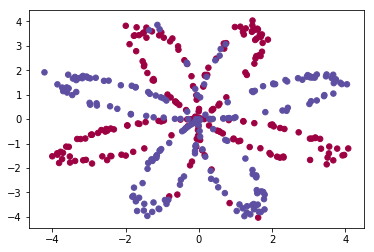

In [55]:
plt.scatter(X[0, :], X[1, :],c=np.squeeze(Y),s=30,cmap=plt.cm.Spectral)

In [76]:
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 1)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [84]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)